# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import os
os.getcwd()

'/Users/montealvo/Documents/SB_DataScience/11_Python_Stats_in_EDA/11.1Stat_Inference/Frequentist_Case _Study'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__
The histogram displays most charges are around 10k. The mean of medical charges is 13270, while the standard deviation is 12110. 

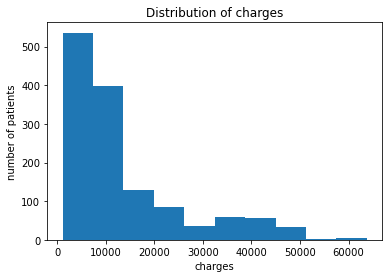

In [5]:
_ = plt.hist(medical.charges, bins=10)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of charges')

In [6]:
np.mean(medical.charges)

13270.422265141257

In [7]:
np.std(medical.charges, ddof=1)

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
 
Given the Central Limit Theorem (CLT, we know that sample statistics approach a normal distribution as n increases, even from highly non-normal distributions of data. 

The most appropropriate frequentist test to apply would be a hypothesis test based on the t distribution. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
A 95% confidence interval would be sufficient to address the administrator's concern. 
Considering that there is no way the the hospitals are paying patients thousands of dollars. A one sided hyphothesis test would be sufficient at identifiying whether actual average charge has fallen below 12,000.

95% of the time, charges lie between (12620.9, 13919.9)

In [8]:
#sample mean estimate
sample_mean = np.mean(medical.charges)
sample_mean

13270.422265141257

In [9]:
#sample st dev estimate
sd = np.std(medical.charges, ddof=1)
sd

12110.011236693994

In [10]:
#standard error
se_t = sd/np.sqrt(len(medical.charges))
se_t

331.06745431568226

In [11]:
len(medical.charges)-1

1337

In [12]:
#critical value
cv_t = t.ppf(1-0.025,1337)
cv_t

1.961739888600845

In [13]:
me_t = cv_t * se_t
me_t

649.4682309486119

In [14]:
#95% CI of mean
lower_t = sample_mean-me_t
upper_t = sample_mean+me_t
lower_t, upper_t

(12620.954034192644, 13919.890496089869)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Are people with insurance charged a different amount to those without?

__null hypothesis:__ People are charged the same amount regardless of insurance status

__alternative hyphothesis:__ People are charged different amounts depending on their insurance status. 

We are assuming that the spread (variance) of both insured and uninsured people are the same. (???)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [15]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [25]:
insured = medical[medical.insuranceclaim == 1]
insured

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.92400,1
1,18,1,33.77,1,0,2,1725.55230,1
4,32,1,28.88,0,0,1,3866.85520,1
6,46,0,33.44,1,0,2,8240.58960,1
10,25,1,26.22,0,0,0,2721.32080,1
...,...,...,...,...,...,...,...,...
1330,57,0,25.74,2,0,2,12629.16560,1
1331,23,0,33.40,0,0,3,10795.93733,1
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1


In [17]:
uninsured = medical[medical.insuranceclaim == 0]

In [51]:
#sample mean estimate
insured_mean = np.mean(insured.charges)
#sample st dev estimate
insured_sd = np.std(insured.charges, ddof=1)
#sample var
insured_var = np.var(insured.charges)
#sample length
insured_len = len(insured)
print(insured_mean)
print(insured_sd)
print(insured_len)
print(insured_var)

16423.928276537663
14045.928418802127
783
197036140.77172482


In [52]:
#sample mean estimate
uninsured_mean = np.mean(uninsured.charges)
#sample st dev estimate
uninsured_sd = np.std(uninsured.charges, ddof=1)
#sample var
uninsured_var = np.var(uninsured.charges)
#sample length
uninsured_len = len(uninsured)
print(uninsured_mean)
print(uninsured_sd)
print(uninsured_len)
print(uninsured_var)

8821.421892306294
6446.510126811736
555
41482614.44965368


In [53]:
t_test_sd = (insured_mean-uninsured_mean)/ np.sqrt(((insured_sd)**2/insured_len)+((uninsured_sd)**2/uninsured_len))
print(t_test_sd)

13.298031957975647


In [57]:
s_pool_num = ((insured_len-1)*insured_var) + ((uninsured_len-1)*uninsured_var)
df=insured_len+uninsured_len-2
s_pool = np.sqrt(s_pool_num/df)
t_test_var = (insured_mean-uninsured_mean)/ (s_pool*np.sqrt((1/insured_len)+(1/uninsured_len)))
print(t_test_var)

11.901306943555385


In [60]:
t_pvalue_sd =1 - t.cdf(t_test_sd,df=df)
t_pvalue_sd =2*t_pvalue_sd
t_pvalue_sd

0.0

In [61]:
t_pvalue_var =1 - t.cdf(t_test_var,df=df)
t_pvalue_var =2*t_pvalue_var
t_pvalue_var

0.0

In [26]:
from scipy.stats import ttest_ind

ttest_ind(insured.charges, uninsured.charges, equal_var = False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

In [27]:
ttest_ind(insured.charges, uninsured.charges, equal_var = True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
Scipy.stats seems to only have 2 transformations related to z-scores, probably because the t-test is more adept to real world data. 

-zmap(scores, compare[, axis, ddof])Calculate the relative z-scores.

-zscore(a[, axis, ddof, nan_policy])Compute the z score.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test